In [35]:
import pandas as pd
from scipy.spatial.distance import euclidean
import math


In [36]:


# read csv into dataframe
df = pd.read_csv('my_dataframe.csv')


# calculate average of AllCost column
df['AvgCost'] = df['AllCost'].apply(lambda x: sum(map(float, x.strip('[]').split(','))) / len(x.strip('[]').split(',')))

# save updated dataframe as csv file
df.to_csv('my_dataframe_updated.csv', index=False)

# print message indicating success
print('Updated dataframe saved to my_dataframe_updated.csv')


Updated dataframe saved to my_dataframe_updated.csv


In [45]:
# read csv into dataframe
df = pd.read_csv('my_dataframe_updated.csv')

# update loss on cell if loss type is l1_loss
for index, row in df.iterrows():
    if row['CostFunc'] == 'l1_loss':
        df.at[index, 'AvgCost'] = row['AvgCost']**2

# sort dataframe based on AvgCost column in ascending order
df = df.sort_values(by='AvgCost')

# save updated dataframe as csv file
df.to_csv('my_dataframe_updated_sorted_loss.csv', index=False)

# print message indicating success
print('Updated dataframe saved to my_dataframe_updated_sorted_loss.csv')


Updated dataframe saved to my_dataframe_updated_sorted_loss.csv


In [38]:
def modified_euclidean_distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        if x[i] == 0.0:
            x[i] = 1e-10
        if y[i] == 0.0:
            y[i] = 1e-10
        r = ((x[i] - y[i]) ** 2) * (max(x[i]/y[i], y[i]/x[i]) ** 2)
        distance += r

    
    return math.sqrt(distance)


def scientific_to_float(scientific_notation):
    parts = scientific_notation.split('e')
    if len(parts) == 1:
        return float(parts[0])
    else:
        a, b = parts[0], int(parts[1])
        if '.' in a:
            c = len(a) - a.index('.') - 1
            a = a.replace('.', '')
            b -= c
        if b < 0:
            return float(a) / (10 ** abs(b))
        else:
            return float(a) * (10 ** b)

In [39]:


# read csv into dataframe
df = pd.read_csv('my_dataframe_updated.csv')

# define known parameters as a list
known_params = [0.01, 55, 0.1, 55, 0.125, 0.0125, 65, 4]

# calculate Euclidean distance between known parameters and BestSol1 column for each row
distances = []
for x in df['BestSol1']:
    params = list(map(scientific_to_float, x.strip('[]').split()))
    distance = modified_euclidean_distance(known_params, params) 
    distances.append(distance)

df['dist_to_known_params'] = distances

# sort dataframe based on distance to known parameters in ascending order
df = df.sort_values(by='dist_to_known_params')

# save updated dataframe as csv file
df.to_csv('my_dataframe_updated_sorted_gt.csv', index=False)

# print message indicating success
print('Updated dataframe saved to my_dataframe_updated_sorted_gt.csv')

Updated dataframe saved to my_dataframe_updated_sorted_gt.csv


In [40]:

# read CSV file
df = pd.read_csv('my_dataframe_updated.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum_BestSol1 = [0] * 8

# iterate over each row in the BestSol1 column
for x in df['BestSol1']:
    # convert the scientific notation string to a list of floats
    params = list(map(scientific_to_float, x.strip('[]').split()))
    # add the values of each parameter to the running total
    for i in range(len(params)):
        param_sum_BestSol1[i] += params[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df)
param_mean__BestSol1 = [x / num_rows for x in param_sum_BestSol1]

print(param_mean__BestSol1)


[0.0690417308266759, 61.06333240680552, 0.5274866569181943, 59.31451697226849, 0.5518099983541666, 0.03604757168063426, 39.144807300606345, 4.0]


In [41]:


# read CSV file
df = pd.read_csv('my_dataframe_updated.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum = [0] * 8

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
    for x in df[col]:
        # convert the scientific notation string to a list of floats
        params = list(map(scientific_to_float, x.strip('[]').split()))
        # add the values of each parameter to the running total
        for i in range(len(params)):
            param_sum[i] += params[i]

# divide each sum by the number of rows and the number of columns to get the mean
num_rows = len(df)
num_cols = 5
param_mean = [x / (num_rows * num_cols) for x in param_sum]

print(param_mean)


[0.0644513574856444, 61.027751884629616, 0.5216837046865928, 59.153178333101835, 0.5529279071341665, 0.03666821397759073, 39.09624042682539, 4.0]


In [51]:
import pandas as pd

# read in the csv file
df = pd.read_csv('my_dataframe_updated_sorted_loss.csv')

# create a dictionary to store the ratings for each parameter
ratings = {'CostFunc_l1_loss': 0, 'CostFunc_l2_loss': 0, 'BatchSize_512': 0, 'BatchSize_1024': 0, 
           'Beta_0': 0, 'Beta_1': 0, 'Beta_10': 0, 'PC_1': 0, 'PC_2': 0,
           'Mu_0.2': 0, 'Mu_0.4': 0, 'Mu_0.8': 0,
           'Sigma_[0.1 2.  0.1 2.  0.1 0.1 2.  0.1]': 0, 
           'Sigma_[0.2 4.  0.2 4.  0.2 0.2 4.  0.2]': 0, 
           'Sigma_[0.3 6.  0.3 6.  0.3 0.3 6.  0.3]': 0}

# iterate over the rows of the dataframe and update the ratings dictionary
for index, row in df.iterrows():
    rating = index  # the rating is the number of rows from the end
    key = f"CostFunc_{row['CostFunc']}"  # build the key for the CostFunc rating
    ratings[key] += rating
    key = f"BatchSize_{row['BatchSize']}"  # build the key for the BatchSize rating
    ratings[key] += rating
    key = f"Beta_{row['Beta']}"  # build the key for the Beta rating
    ratings[key] += rating
    key = f"PC_{row['PC']}"  # build the key for the PC rating
    ratings[key] += rating
    key = f"Mu_{row['Mu']}"  # build the key for the Mu rating
    ratings[key] += rating
    key = f"Sigma_{row['Sigma']}"  # build the key for the Sigma rating
    ratings[key] += rating

# print out the ratings for each parameter
for key, value in ratings.items():
    print(f"{key}: {value}")


CostFunc_l1_loss: 10387
CostFunc_l2_loss: 12833
BatchSize_512: 11239
BatchSize_1024: 11981
Beta_0: 7012
Beta_1: 7821
Beta_10: 8387
PC_1: 12256
PC_2: 10964
Mu_0.2: 9452
Mu_0.4: 6371
Mu_0.8: 7397
Sigma_[0.1 2.  0.1 2.  0.1 0.1 2.  0.1]: 9000
Sigma_[0.2 4.  0.2 4.  0.2 0.2 4.  0.2]: 6736
Sigma_[0.3 6.  0.3 6.  0.3 0.3 6.  0.3]: 7484


<Figure size 640x480 with 0 Axes>

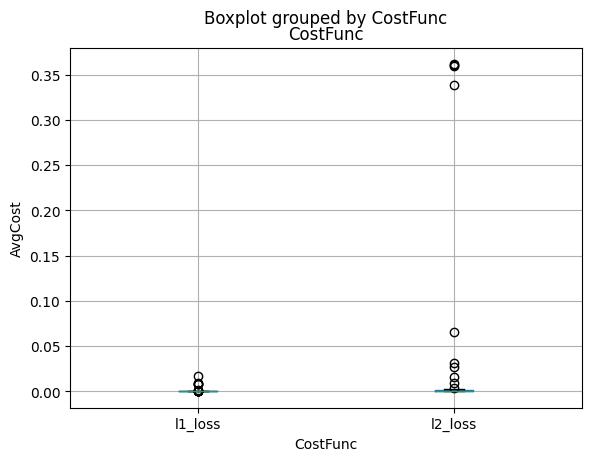

<Figure size 640x480 with 0 Axes>

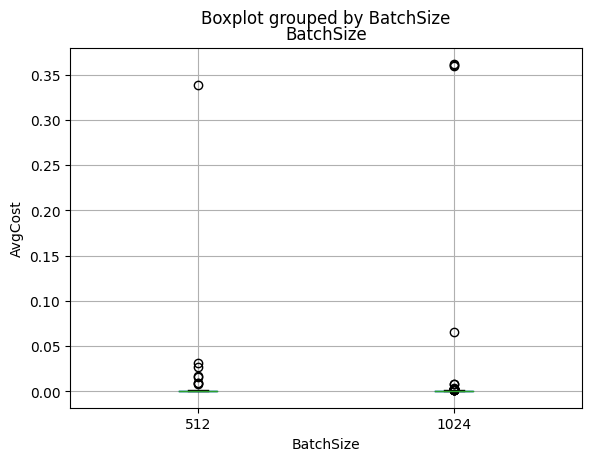

<Figure size 640x480 with 0 Axes>

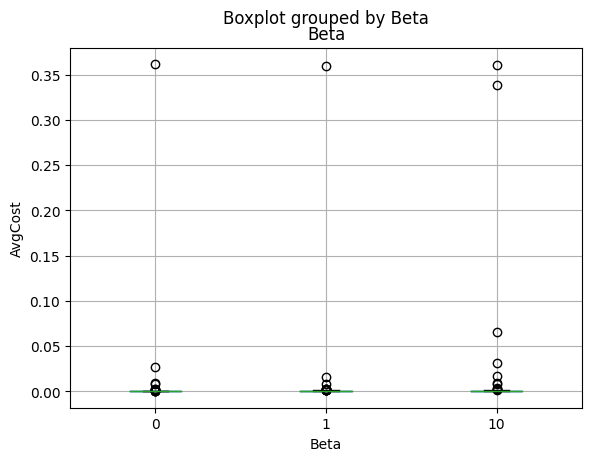

<Figure size 640x480 with 0 Axes>

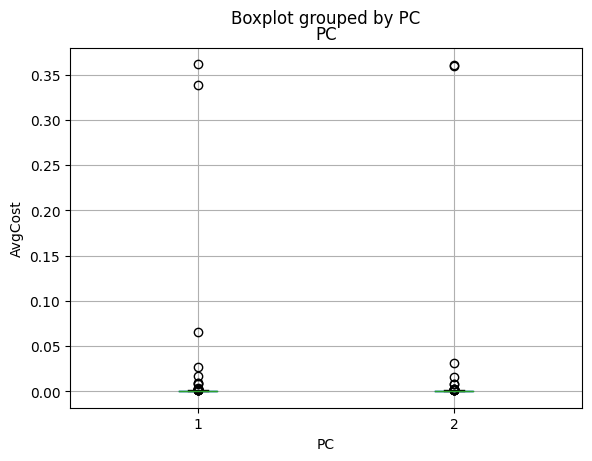

<Figure size 640x480 with 0 Axes>

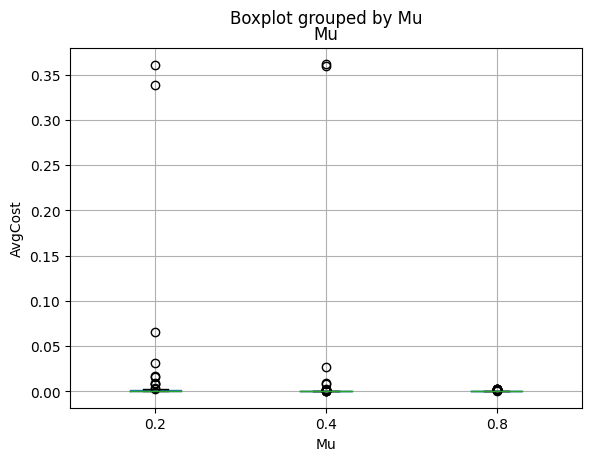

<Figure size 640x480 with 0 Axes>

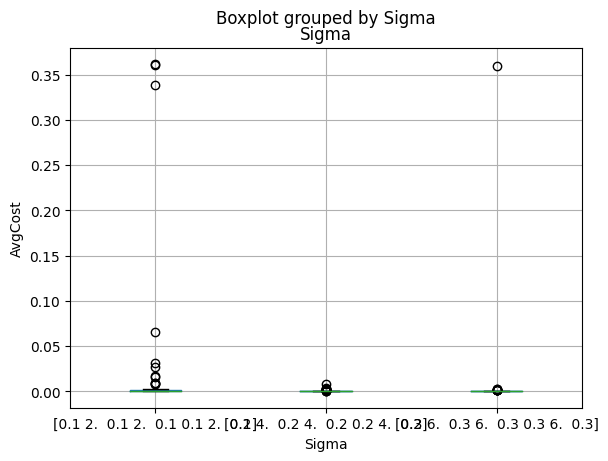

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
df = pd.read_csv('my_dataframe_updated_sorted_loss.csv')

# create a list of the hyperparameters
hyperparams = ['CostFunc', 'BatchSize', 'Beta', 'PC', 'Mu', 'Sigma']

# create a box plot for each hyperparameter
for param in hyperparams:
    plt.figure()
    df.boxplot(column='AvgCost', by=param)
    plt.title(param)
    plt.xlabel(param)
    plt.ylabel('AvgCost')
    
plt.show()


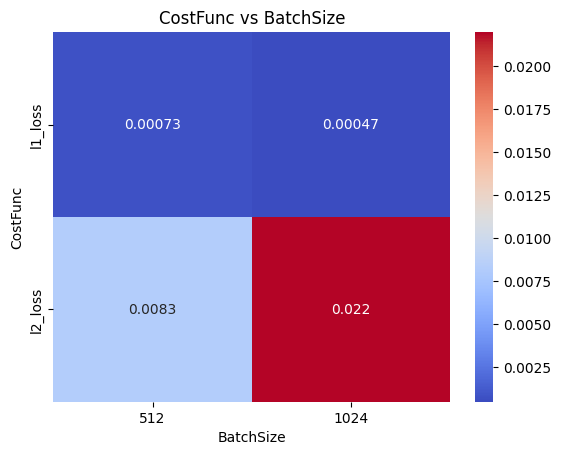

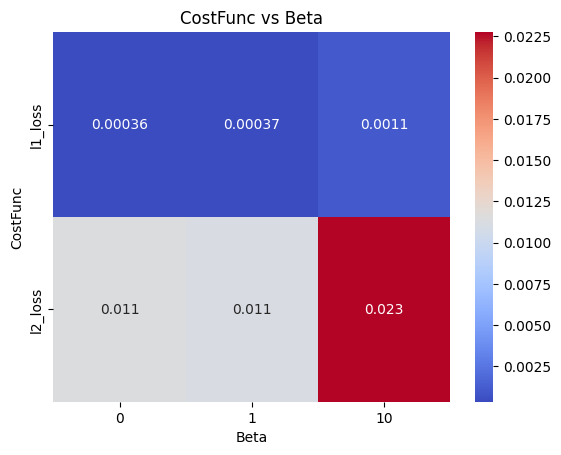

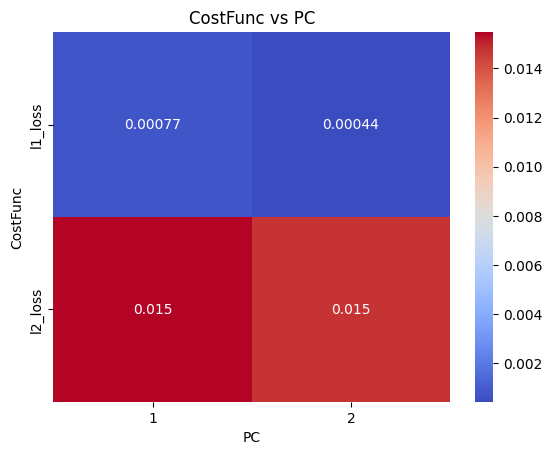

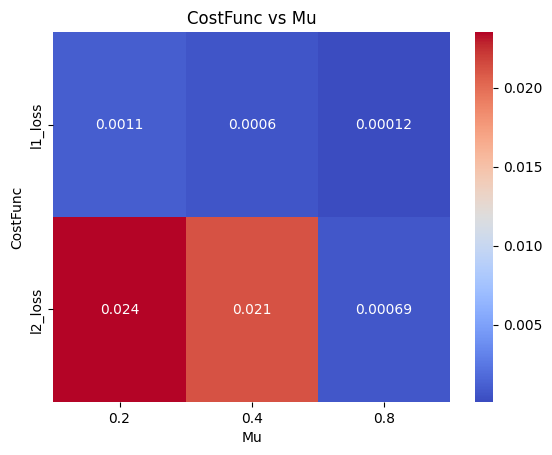

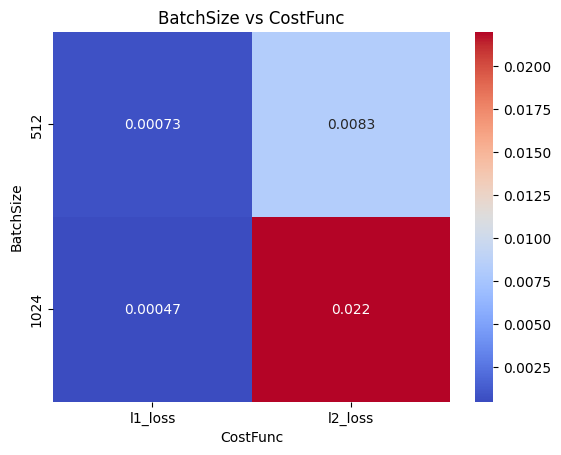

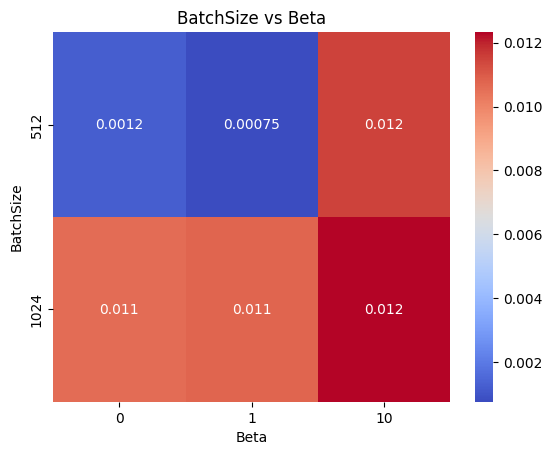

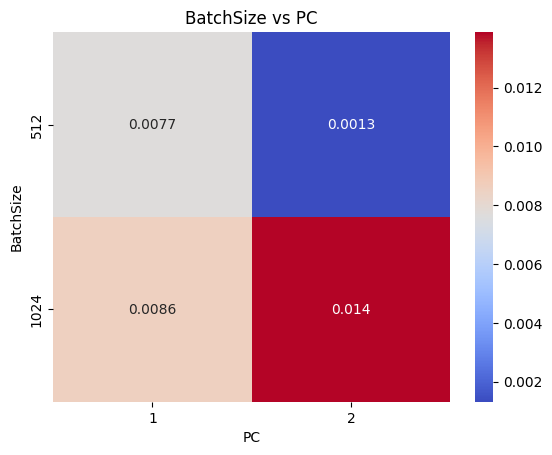

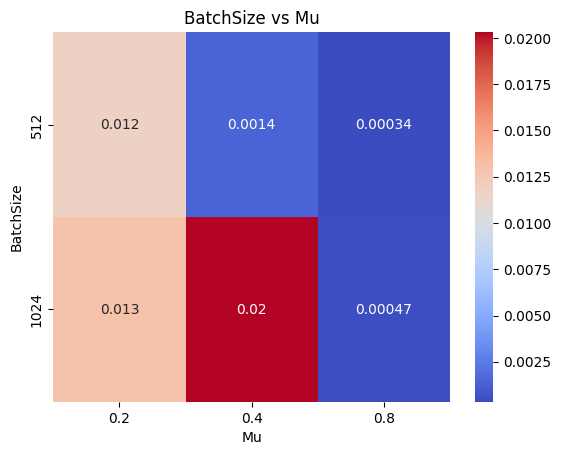

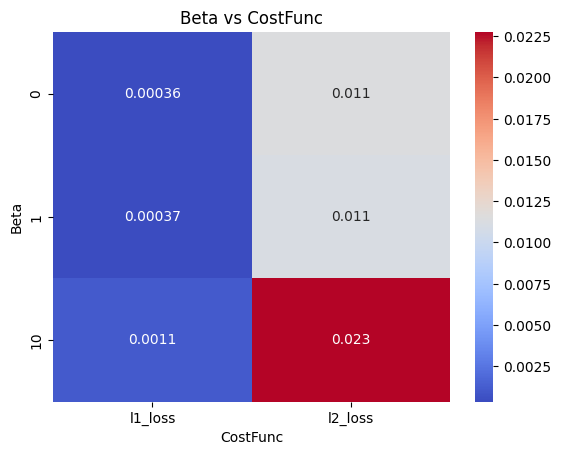

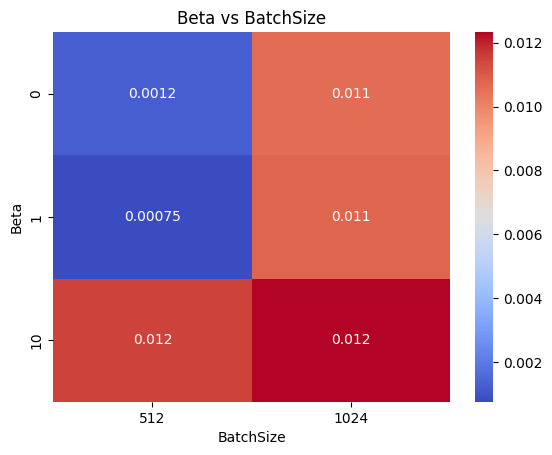

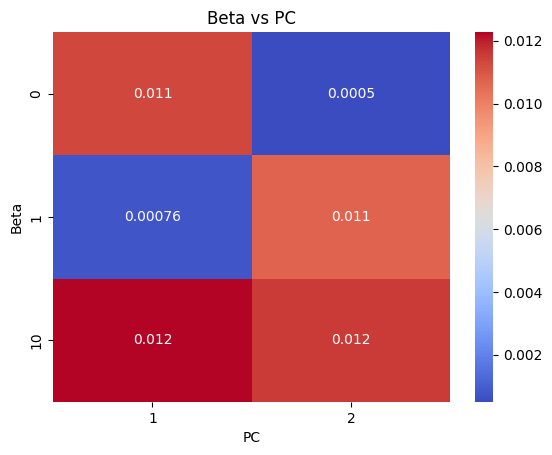

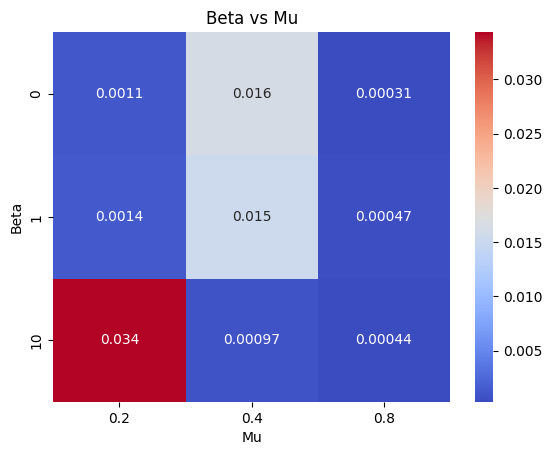

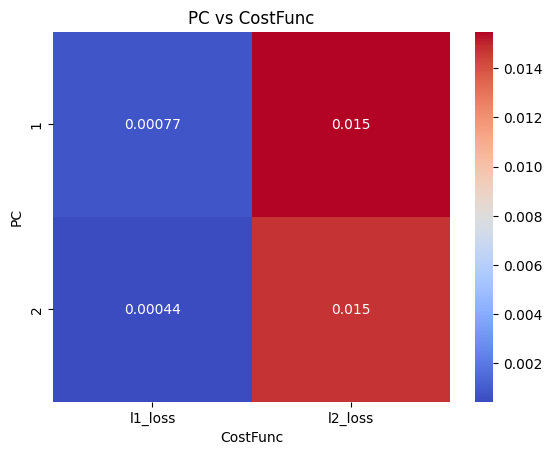

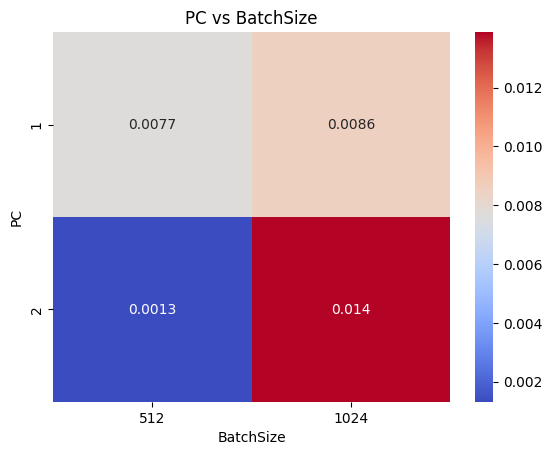

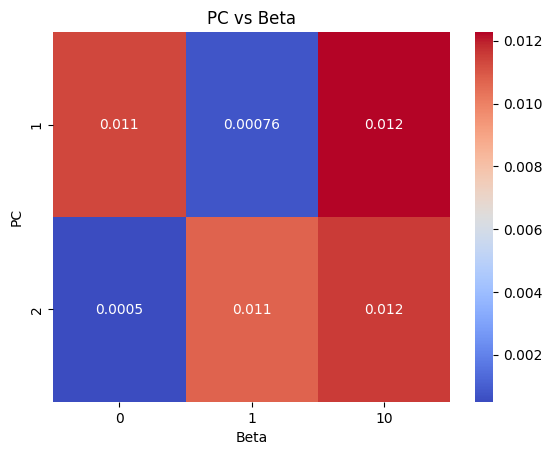

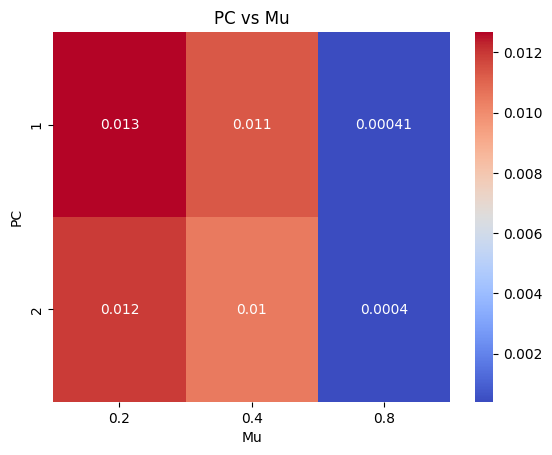

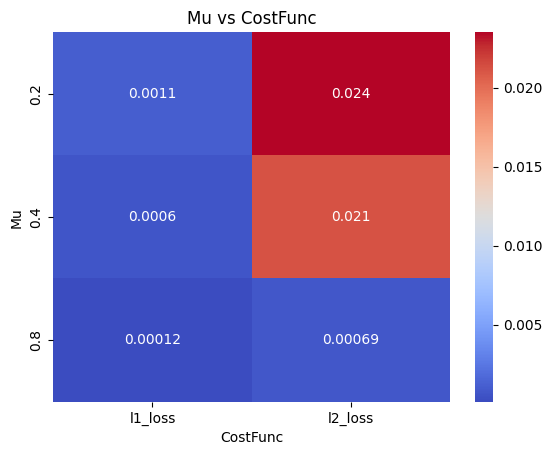

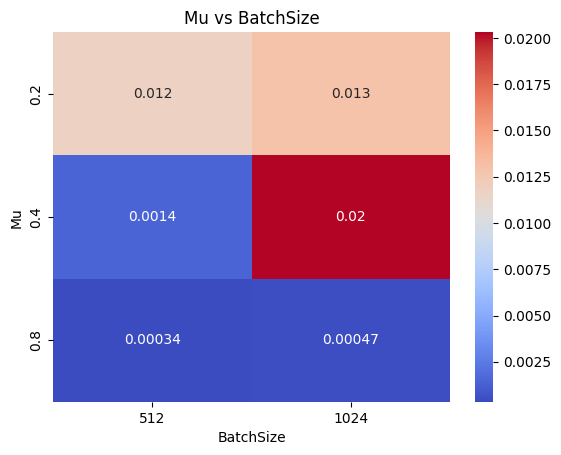

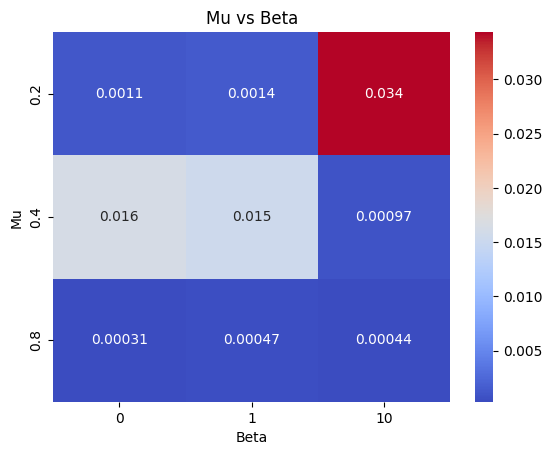

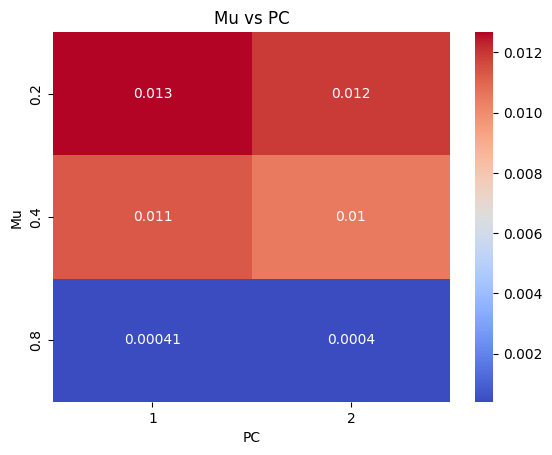

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read in the csv file
df = pd.read_csv('my_dataframe_updated_sorted_loss.csv', usecols=['CostFunc', 'BatchSize', 'Beta', 'PC', 'Mu', 'Sigma', 'AvgCost'])

# loop over each hyperparameter pair
for hyperparam1 in ['CostFunc', 'BatchSize', 'Beta', 'PC', 'Mu']:
    for hyperparam2 in ['CostFunc', 'BatchSize', 'Beta', 'PC', 'Mu']:
        if hyperparam1 != hyperparam2:
            # create a pivot table of the hyperparameters and AvgCost
            pivot = df.groupby([hyperparam1, hyperparam2]).mean().unstack()['AvgCost']

            # create a heatmap of the pivot table
            sns.heatmap(pivot, annot=True, cmap='coolwarm')
            plt.title(f'{hyperparam1} vs {hyperparam2}')
            plt.show()
